# EJERCICIOS

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MultiLabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,confusion_matrix
from sklearn.svm import SVC 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_predict,cross_val_score,cross_validate
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, accuracy_score,make_scorer
from scipy.stats import reciprocal
from sklearn.feature_extraction.text import TfidfVectorizer

## EJERCICIO 1

Vamos a trabajar con el siguiente conjunto de datos: https://www.datacamp.com/es/datalab/datasets/dataset-python-loans

| Variable      	| Explicación                                                                                                             |
|-------------------|-------------------------------------------------------------------------------------------------------------------------|
| credit_policy	    | 1 si el cliente cumple con los criterios de suscripción de crédito; 0 en caso contrario.                                |
| purpose	        | El propósito del préstamo.                                                                                              |
| int_rate	        | La tasa de interés del préstamo (a los prestatarios más riesgosos se les asignan tasas más altas).                      |
| installment	    | Las cuotas mensuales del prestamo                                                                                       |
| log_annual_inc    | El logaritmo natural del ingreso anual declarado por el prestatario.                                                    |
| dti	            | La relación deuda-ingreso del prestatario (monto de deuda dividido por ingresos anuales).                               |
| fico	            | El puntaje de crédito FICO del prestatario.                                                                             |
| days_with_cr_line	| El número de días que el prestatario ha tenido una línea de crédito.                                                    |
| revol_bal	        | El saldo rotativo del prestatario (monto no pagado al final del ciclo de facturación de la tarjeta).                    |
| revol_util        | La tasa de utilización de la línea de crédito del prestatario (monto de crédito utilizado respecto al total disponible).|
| inq_last_6mths	| El número de consultas de los acreedores al prestatario en los últimos 6 meses.                                         |
| delinq_2yrs	    | El número de veces que el prestatario ha estado más de 30 días en mora en un pago en los últimos 2 años.                |
| pub_rec	        | El número de registros públicos despectivos del prestatario.                                                            |
| not_fully_paid    | 1 si el préstamo se pagó totalmente; 0 en caso contrario.                                                        |

El csv lo tienes disponible en Moodle

Este conjunto de datos consta de más de 9500 préstamos con información sobre los datos del préstamo y si el préstamo fue pagado en su totalidad o no. Estos datos fueron extraídos de LendingClub.com
Crea un clasificador para predecir si un prestamo va a ser pagado o no.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [81]:
loan_data = pd.read_csv("datos/loan_data.csv")

#### EXPLORAR LOS DATOS

Entre otras cosas: estadísticas, matriz de correlaciones y borrar columnas innecesarias.

In [82]:
df_prestamos=pd.DataFrame(loan_data)
df_prestamos.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [83]:
df_prestamos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [84]:
df_prestamos.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [85]:
corr_matrix = df_prestamos.corr(numeric_only=True)
corr_matrix["not.fully.paid"].sort_values(ascending=False)

not.fully.paid       1.000000
int.rate             0.159552
inq.last.6mths       0.149452
revol.util           0.082088
revol.bal            0.053699
installment          0.049955
pub.rec              0.048634
dti                  0.037362
delinq.2yrs          0.008881
days.with.cr.line   -0.029237
log.annual.inc      -0.033439
fico                -0.149666
credit.policy       -0.158119
Name: not.fully.paid, dtype: float64

In [86]:
corr_matrix.style.background_gradient()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


In [87]:
columns_to_drop = ["delinq.2yrs","days.with.cr.line","log.annual.inc",]
df_prestamos_dropped=df_prestamos.drop(columns=columns_to_drop)
df_prestamos_dropped.head()

,credit.policy,purpose,int.rate,installment,dti,fico,revol.bal,revol.util,inq.last.6mths,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,19.48,737,28854,52.1,0,0,0
1,1,credit_card,0.1071,228.22,14.29,707,33623,76.7,0,0,0
2,1,debt_consolidation,0.1357,366.86,11.63,682,3511,25.6,1,0,0
3,1,debt_consolidation,0.1008,162.34,8.10,712,33667,73.2,1,0,0
4,1,credit_card,0.1426,102.92,14.97,667,4740,39.5,0,0,0


#### DIVIDIR LOS DATOS

In [88]:
strat_train_set, strat_test_set = train_test_split(df_prestamos_dropped, test_size=0.15, stratify=df_prestamos_dropped["not.fully.paid"], random_state=42)
strat_test_set["not.fully.paid"].value_counts() / len(strat_test_set)

not.fully.paid
0    0.839944
1    0.160056
Name: count, dtype: float64

#### PREPARAR LOS DATOS

In [89]:
number_attributes=['credit.policy', 'int.rate','installment','dti','fico','revol.bal','revol.util','inq.last.6mths','pub.rec']

number_pipeline=make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)
purpose_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder()
)

preprocessing = ColumnTransformer([
    ("purpose_transform", purpose_pipeline, ["purpose"]),
    ("number_transform", number_pipeline,number_attributes)
    ],verbose_feature_names_out = False)

In [90]:
prestamos_prepared = preprocessing.fit_transform(strat_test_set)
preprocessing.get_feature_names_out()

array(['purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business', 'credit.policy', 'int.rate',
       'installment', 'dti', 'fico', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'pub.rec'], dtype=object)

In [91]:
prestamos_prepared_fr = pd.DataFrame(
    prestamos_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=strat_test_set.index)
prestamos_prepared_fr

,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,credit.policy,int.rate,installment,dti,fico,revol.bal,revol.util,inq.last.6mths,pub.rec
4262,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.501739,-1.201065,0.929871,0.099139,1.598462,1.830480,-0.616098,-0.678530,-0.22587
8111,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.993068,-0.188597,-1.343772,0.987296,-1.008200,-0.324684,1.322133,0.960894,-0.22587
110,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.501739,-0.600139,-0.380078,-0.774314,0.034465,0.722872,1.085933,-0.268674,-0.22587
1581,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.501739,0.292143,1.727795,-0.531688,-0.486867,-0.316879,0.165447,-0.678530,-0.22587
3136,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.501739,0.681834,2.600453,0.774079,-0.095868,1.776609,-0.053385,0.141182,-0.22587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6341,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.501739,2.633930,0.330562,-0.109666,-1.268866,-0.292013,-0.084647,0.141182,-0.22587
2133,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.501739,0.219304,0.425253,1.465195,0.555798,-0.146514,-0.456315,0.551038,-0.22587
6620,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.501739,-0.276004,0.070678,0.516749,0.295131,-0.346534,-0.946083,0.141182,-0.22587
6089,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.501739,0.230230,0.102659,1.394613,-0.356534,0.180644,0.721212,-0.678530,-0.22587


### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Usa evaluación cruzada con los siguientes algoritmos:
- Regresión logisitca
- SGDClassifier
- K vecinos mas cercanos
- Random Forest

 y evalua los resultados en el conjunto de entrenamiento con las siguientes métricas: exactitud, prescisión, sensibilidad, f1, curva de roc y área bajo la curva de roc

In [92]:
X_train = strat_train_set.drop("not.fully.paid", axis=1)
y_train = strat_train_set["not.fully.paid"]

X_test = strat_test_set.drop("not.fully.paid", axis=1)
y_test = strat_test_set["not.fully.paid"]

#### REGRESION LOGISTICA

In [93]:
log_reg = make_pipeline(preprocessing, LogisticRegression())
log_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('purpose_transform',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['purpose']),
                                                 ('number_transform',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['credit.policy', 'int.rate',
                                                   'installment', 'dti', 'fico',
                                                   'revol.bal', 'revol.util',
                                                   'inq.last.6mths',
                                                   'pub.rec'])],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression())])

EVALUACIÓN CRUZADA

In [94]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Aplicar la evaluación cruzada
cv_results = cross_validate(log_reg, X_train, y_train, cv=5, scoring=scoring)

# Mostrar los resultados promedio de cada métrica
for metric, scores in cv_results.items():
    if 'test' in metric:  # Filtrar métricas de prueba
        print(f"{metric}: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

test_accuracy: 0.8397 ± 0.0029
test_precision: 0.4688 ± 0.1583
test_recall: 0.0230 ± 0.0137
test_f1: 0.0435 ± 0.0254


EXACTITUD

In [95]:
cross_val_score(log_reg, X_train, y_train, cv=3, scoring="accuracy")

array([0.83603537, 0.84266765, 0.84187247])

MATRIZ DE CONFUSION

In [96]:
y_train_pred = cross_val_predict(log_reg, X_train, y_train, cv=3)
cm = confusion_matrix(y_train, y_train_pred)
cm


array([[6808,   30],
       [1271,   32]])

PRECISION Y SENSIBILIDAD

In [97]:
precision_score(y_train, y_train_pred)

np.float64(0.5161290322580645)

In [98]:
recall_score(y_train, y_train_pred)

np.float64(0.024558710667689946)

F1

In [99]:
f1_score(y_train, y_train_pred)

np.float64(0.046886446886446886)

CURVA DE ROC

In [100]:
y_train_pred = cross_val_predict(log_reg, X_train, y_train, cv=3, method="decision_function")
fpr, tpr, _ = roc_curve(y_train, y_train_pred)

ÁREA BAJO LA CURVA DE ROC

In [101]:
roc_auc = auc(fpr, tpr)
roc_auc

np.float64(0.6648295370752176)

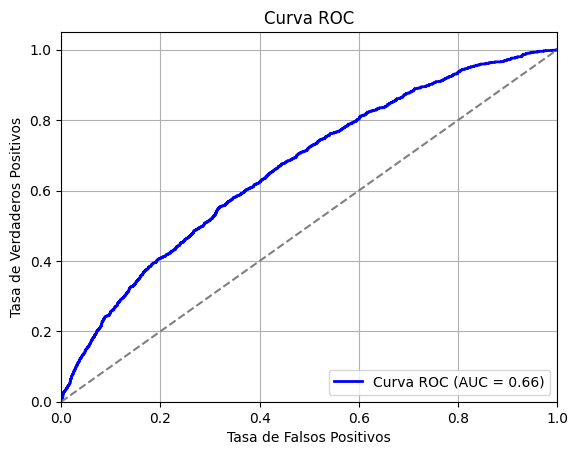

In [102]:
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"Curva ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### CLASIFICADOR DE DESCENSO DE GRADIANTES ESTOCÁSTICO (SGDC)

In [103]:
X_train = strat_train_set.drop("not.fully.paid", axis=1)
y_train = strat_train_set["not.fully.paid"]

X_test = strat_test_set.drop("not.fully.paid", axis=1)
y_test = strat_test_set["not.fully.paid"]

In [104]:
sgd_clf =make_pipeline(preprocessing, SGDClassifier(random_state=42))
sgd_clf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('purpose_transform',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['purpose']),
                                                 ('number_transform',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['credit.policy', 'int.rate',
                                                   'installment', 'dti', 'fico',
                                                   'revol.bal', 'revol.util',
                                                   'inq.last.6mths',
                                                   'pub.rec'])],
                                   verbose_feature_names_out=False)),
                ('sgdclassifier', SGDClassifier(random_state=42))])

EVALUACION CRUZADA

In [105]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.83419307, 0.84008843, 0.83450055])

PRECISION

In [106]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
precision_score(y_train, y_train_pred)

np.float64(0.21153846153846154)

SENSIBILIDAD

In [107]:
recall_score(y_train, y_train_pred)

np.float64(0.00844205679201842)

F1

In [108]:
f1_score(y_train, y_train_pred)

np.float64(0.016236162361623615)

CURVA DE ROC

In [109]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method="decision_function")
fpr, tpr, _ = roc_curve(y_train, y_train_pred)

ÁREA BAJO LA CURVA DE ROC

In [110]:
roc_auc = auc(fpr, tpr)
roc_auc

np.float64(0.5488129290585746)

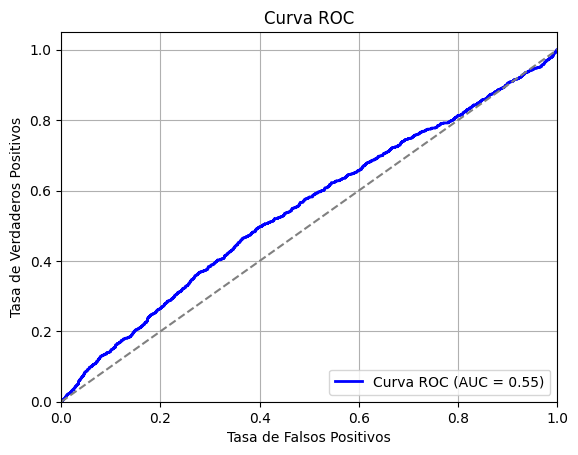

In [111]:
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"Curva ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### RANDOM FOREST CLASSIFIER

In [112]:
X_train = strat_train_set.drop("not.fully.paid", axis=1)
y_train = strat_train_set["not.fully.paid"]

X_test = strat_test_set.drop("not.fully.paid", axis=1)
y_test = strat_test_set["not.fully.paid"]

In [113]:
forest_clf =make_pipeline(preprocessing, RandomForestClassifier(random_state=42))
forest_clf.fit(X_train,y_train)
y_train_forest_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)

EVALUACION CRUZADA

In [114]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.83603537, 0.83198231, 0.83744932])

PRECISION

In [115]:
precision_score(y_train, y_train_forest_pred)

np.float64(0.3333333333333333)

SENSIBILIDAD

In [116]:
recall_score(y_train, y_train_forest_pred)

np.float64(0.029930928626247123)

F1

In [117]:
f1_score(y_train, y_train_forest_pred)

np.float64(0.054929577464788736)

CURVA DE ROC

In [118]:
y_train_forest_pred = cross_val_predict(
    forest_clf, X_train, y_train, cv=3, method="predict_proba"
)

# Extraer las probabilidades de la clase positiva (columna 1)
y_train_forest_pred_pos = y_train_forest_pred[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_train, y_train_forest_pred_pos)

ÁREA BAJO LA CURVA DE ROC

In [119]:
roc_auc = auc(fpr, tpr)
roc_auc

np.float64(0.6183228592329848)

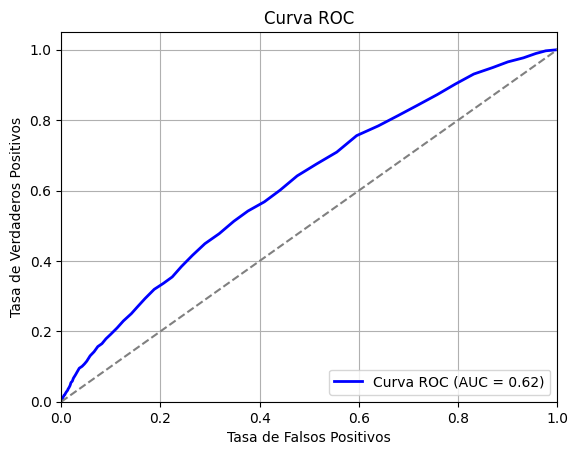

In [120]:
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"Curva ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### K VECINOS MAS CERCANOS (KNNCLASSIFIER)

In [121]:
X_train = strat_train_set.drop("not.fully.paid", axis=1)
y_train = strat_train_set["not.fully.paid"]

X_test = strat_test_set.drop("not.fully.paid", axis=1)
y_test = strat_test_set["not.fully.paid"]

In [122]:
knn_clf = make_pipeline(preprocessing, KNeighborsClassifier())
knn_clf.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('purpose_transform',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['purpose']),
                                                 ('number_transform',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['credit.policy', 'int.rate',
                                                   'installment', 'dti', 'fico',
                                                   'revol.bal', 'revol.util',
                                                   'inq.last.6mths',
                                                   'pub.rec'])],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [123]:
knn_clf.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

EVALUACION CRUZADA

In [124]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
y_train_knn_pred

array([0, 0, 0, ..., 0, 0, 0])

PRECISION

In [125]:
precision_score(y_train, y_train_knn_pred)

np.float64(0.2713864306784661)

SENSIBILIDAD

In [126]:
recall_score(y_train, y_train_knn_pred)

np.float64(0.07060629316960859)

F1

In [127]:
f1_score(y_train, y_train_knn_pred, average="macro")

np.float64(0.506234150675905)

CURVA DE ROC

In [128]:

y_train_knn_pred = cross_val_predict(
    knn_clf, X_train, y_train, cv=3, method="predict_proba"
)

# Extraer las probabilidades de la clase positiva (columna 1)
y_train_knn_pred_pos = y_train_knn_pred[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_train, y_train_knn_pred_pos)


ÁREA BAJO LA CURVA DE ROC

In [129]:
roc_auc = auc(fpr, tpr)
roc_auc

np.float64(0.5690975805153675)

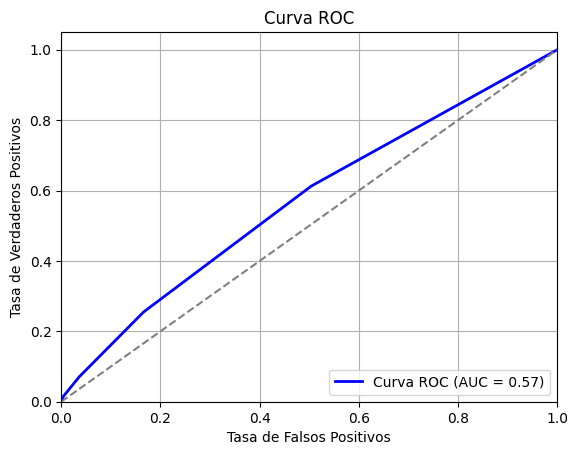

In [130]:
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"Curva ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### OPMITZACIÓN DEL MODELO

#### OPTIMIZACIÓN

Usa búsqueda exhaustiva o búsqueda aleatoria para optimizar el mejor modelo del apartado anterior

#### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

Evalúa el conjunto de pruebas con diferentes métricas

### PRESENTACIÓN DE LA SOLUCIÓN

Guarda mejor modelo (pipeline de preparación de los datos + modelo) y  haz un script de python que te pida los datos necesarios ('int_rate', 'installment', 'fico',  'revol_bal', 'revol_util', 'inq_last_6mths', 'pub_rec' y 'purpose') y prediga la solución.

## EJERCICIO 2

Vamos a trabajar conun conjunto de datos digits.

Crea un clasificador que nos diga de que número se trata.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [131]:
# Cargar el conjunto de datos
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

#### EXPLORAR LOS DATOS

In [132]:
df = pd.DataFrame(X_digits)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

In [134]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


#### DIVIDIR LOS DATOS

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.2, random_state=42)

#### PREPARAR LOS DATOS

In [142]:
scaler=StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Usa evaluación cruzada con los siguientes algoritmos, evalua los resultados en el conjunto de entrenamiento (exactitud) y calcula la matriz de confusión:
- Regresión logistica
- Maquinas de vectores de sorpote
- Random forest

### REGRESION LOGISTICA

ENTRENAMIENTO

In [143]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000, random_state=42)

EVALUACION CRUZADA

In [156]:
scores=cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring="accuracy")
print(f"Exactitud media en entrenamiento: {np.mean(scores):.4f}")

Exactitud media en entrenamiento: 0.9617


MATRIZ DE CONFUSION

In [145]:
y_train_pred = cross_val_predict(log_reg, X_train_scaled, y_train, cv=5)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[144,   0,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0, 144,   0,   2,   0,   1,   1,   0,   4,   2],
       [  0,   1, 142,   1,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 144,   0,   0,   0,   0,   3,   2],
       [  0,   1,   0,   0, 127,   0,   0,   2,   3,   2],
       [  0,   1,   0,   0,   1, 130,   0,   0,   0,   3],
       [  0,   1,   0,   0,   1,   0, 143,   0,   1,   0],
       [  0,   0,   0,   0,   1,   0,   0, 143,   1,   0],
       [  1,   7,   2,   1,   1,   0,   0,   0, 132,   0],
       [  0,   2,   0,   0,   0,   2,   0,   2,   1, 133]])

### MAQUINA DE VECTORES DE SOPORTE

ENTRENAMIENTO

In [146]:
svc_mod=SVC(random_state=42)
svc_mod.fit(X_train_scaled,y_train)

SVC(random_state=42)

EVALUACION CRUZADA

In [154]:
scores=cross_val_score(svc_mod, X_train_scaled, y_train, cv=5, scoring="accuracy")
print(f"Exactitud media en entrenamiento: {np.mean(scores):.4f}")

Exactitud media en entrenamiento: 0.9770


MATRIZ CONFUSION

In [148]:
y_train_pred = cross_val_predict(svc_mod, X_train_scaled, y_train, cv=5)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[145,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 153,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,   0, 140,   0,   3,   0,   0,   1,   0,   0],
       [  0,   0,   0, 145,   1,   0,   0,   0,   3,   0],
       [  0,   0,   0,   0, 130,   0,   0,   2,   2,   1],
       [  0,   0,   0,   0,   1, 133,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0, 146,   0,   0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 143,   0,   0],
       [  0,   3,   0,   1,   1,   0,   0,   0, 137,   2],
       [  0,   1,   0,   1,   0,   2,   1,   2,   1, 132]])

### RANDOM FOREST CLASSIFIER

ENTRENAMIENTO

In [149]:
forest_clf=RandomForestClassifier(random_state=42)
forest_clf.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=42)

EVALUACION CRUZADA

In [155]:
scores=cross_val_score(forest_clf, X_train, y_train, cv=5, scoring="accuracy")
print(f"Exactitud media en entrenamiento: {np.mean(scores):.4f}")

Exactitud media en entrenamiento: 0.9736


MATRIZ DE CONFUSION

In [153]:
y_pred = forest_clf.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
cm

array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 39]])

### OPMITZACIÓN DEL MODELO

#### OPTIMIZACIÓN

Usa búsqueda exhaustiva o búsqueda aleatoria para optimizar el mejor modelo del apartado anterior

#### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

### PRESENTACIÓN DE LA SOLUCIÓN

Simplemente guarda el modelo

## EJERCICIO 3

Vamos a trabajar con un conjunto de datos donde cada instancia (en este caso, cada película) pueda tener múltiples etiquetas (géneros en este caso).

Tienes los datos en el fichero tmdb_5000_movies.csv

Crea un clasificador que te diga los generos que le corresponden a cada película.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [157]:
# Cargar los datos
data = pd.read_csv("Datos/tmdb_5000_movies.csv")

# Preprocesamiento de datos
# Transformar géneros en listas de palabras separadas
data["genres"] = data["genres"].apply(lambda x: [genre["name"] for genre in eval(x)])

# Dividir los datos en características (X) y etiquetas (y)
X = data["overview"]
y = data["genres"]

#### EXPLORAR LOS DATOS

#### DIVIDIR LOS DATOS

#### PREPARAR LOS DATOS

Tienes aquí las transformaciones que hay que hacer a los datos pero busca en internet que estamos haciendo exactamente y explicalo (igual hay que hacer algo con los datos que faltan)

In [158]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

mlb = MultiLabelBinarizer()
y_train_transformed = mlb.fit_transform(y_train)


AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [ ]:
y_test_transformed = mlb.transform(y_test)

### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Crea un modelo Random Forest y evalúa el modelo en el conjunto de entrenamiento (accuracy), no hace falta usar validación cruzada.

#### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

Evalúa el modelo en el conjuno de prueba y muestra las primeras 25 predicciones y sus correspondientes valores reales (con texto, para lo cual tendras que aplicar mlb.inverse_transform a las predicciones).

¿Qué puedes deducir del resultado?